In [134]:
import numpy as np
import matplotlib.pyplot as plt
import time

### ZAD 1
#### 1.1
Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych
w tablicy o N = 107
elementach. Tablica wypełniona jest tą samą wartością v z
przedziału [0.1, 0.9] np. v = 0.53125.


In [137]:
N = 10**7
v = np.float32(0.53125)
numbers = [v] * N

In [138]:
def sum_numbers(numbers):
    sum = 0
    for number in numbers:
        sum += number
    return sum

In [139]:
def sum_numbers_float32(numbers):
    sum = np.float32(0)
    for number in numbers:
        sum += number
    return sum

#### 1.2
Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak
duży?

In [140]:
def absolute_error(a,b):
    return abs(a-b)

In [141]:
def relative_error(a,b):
    return abs(a - b) / b

In [142]:
def sum_and_count_errors(numbers):
    a = sum_numbers(numbers)
    b = sum_numbers_float32(numbers)

    print("Sum using double: " + str(a))
    print("Sum using float32: " + str(b))
    print("Absolute error: " + str(absolute_error(a,b)))
    print("Relative error: " + str(relative_error(a,b)))
    
sum_and_count_errors(numbers)

Sum using double: 5312500.0
Sum using float32: 5030840.5
Absolute error: 281659.5
Relative error: 0.05598656924225683


#### 1.3
W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

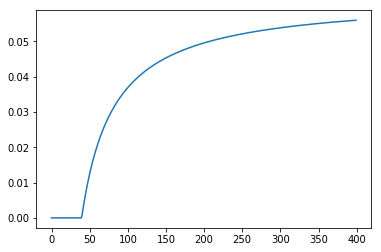

In [143]:
def plot_relative_error_growth(N,numbers):
    result = []
    i = 0
    sum = 0
    sum32 = np.float32(0)
    while i < N:
        sum += numbers[i]
        sum32 += numbers[i] 
        if i % 25000 == 0:
            result.append(relative_error(sum,sum32))
        i += 1
    plt.plot(result)
    plt.show()
    
plot_relative_error_growth(N,numbers)

#### 1.4
Zaimplementuj rekurencyjny algorytm sumowania, działający jak na rysunku poniżej.

In [144]:
def recursive_sum(numbers):
    if len(numbers) == 1: return numbers[0]
    return recursive_sum(numbers[:len(numbers)//2]) + recursive_sum(numbers[len(numbers)//2 :])

#### 1.5
Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie
zmalał?

In [145]:
rec_sum = recursive_sum(numbers)
sum = sum_numbers(numbers)

print("Absolute error: " + str(absolute_error(rec_sum,sum)))
print("Relative error: " + str(relative_error(rec_sum,sum)))

Absolute error: 0.0
Relative error: 0.0


#### 1.6
Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [146]:
start = time.time()
sum_numbers(numbers)
end = time.time()

print("Normal algorithm: " + str(end - start) + "s")

start = time.time()
recursive_sum(numbers)
end = time.time()

print("Recursive algirithm: " + str(end-start)+ "s")

Normal algorithm: 0.8237974643707275s
Recursive algirithm: 6.130611181259155s


#### 1.7
Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.

### ZAD 2
Zaimplementuj algorytm sumowania Kahana.


In [147]:
def kahan_sum(numbers):
    sum = np.float32(0)
    error = np.float32(0)
    for number in numbers:
        y = number - error
        t = sum + y
        error = (t - sum) - y
        sum = t
    return sum


#### 2.1
Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych jak w przypadku testów z Zadania 1.

In [148]:
kahan = kahan_sum(numbers)

print("Absolute error: " + str(absolute_error(kahan,sum)))
print("Relative error: " + str(relative_error(kahan,sum)))

Absolute error: 0.0
Relative error: 0.0


#### 2.2
Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne?
Do czego służy zmienna err?


<ul>
   <li> Algorytm Kahana oblicza sumę zapamiętując błąd wynikający z dodania bardzo małej liczby do dużej liczby, po czym w następnej iteracji dodaje ten błąd do inputu (małej liczby), znacząco maleje przez to błąd numeryczny całego wyrażenia
<li>err - służy do akumulacji błędu
</ul>    

#### 2.3
 Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego dla tych samych danych wejściowych.


In [149]:
start = time.time()
recursive_sum(numbers)
end = time.time()

print("Recursive algirithm: " + str(end - start) + "s")

start = time.time()
kahan_sum(numbers)
end = time.time()

print("Kahan algirithm: " + str(end-start)+ "s")

Recursive algirithm: 6.33406662940979s
Kahan algirithm: 2.490342855453491s


### ZAD 3
Rozważ sumy częściowe szeregu definiującego funkcję dzeta Riemanna oraz funkcję eta Dirichleta



In [150]:
S = [2,3.6667,5,7.2,10]
N = [50,100,200,500,1000]

In [151]:
def dzeta_forth(s, n, zero=0, eta=False):
    sum = zero
    for k in range(1, n + 1):
        a = (-1)**(k-1) if eta else 1
        sum += 1 / ((k ** s) * a)
    return sum

In [152]:
def dzeta_back(s, n, zero=0, eta=False):
    sum = zero
    for k in range(n, 0, -1):
        a = (-1)**(k-1) if eta else 1
        sum += 1 / ((k ** s) * a)
    return sum

In [ ]:
for s in S:
    for n in N:
        dzeta = {'double':{'forth': dzeta_forth(s,n),'back': dzeta_back(s,n)},
                'float32':{'forth': dzeta_forth(s,n,zero=np.float32(0)),'back':dzeta_back(s,n,zero=np.float32(0))}};
        eta = {'double':{'forth': dzeta_forth(s,n,eta=True),'back': dzeta_back(s,n,eta=True)},
              'float32':{'forth': dzeta_forth(s,n,zero=np.float32(0),eta=True),
              'back':dzeta_back(s,n,zero=np.float32(0),eta=True)}};
        print("Absolute error float/double forth: ",absolute_error(dzeta['float32']['forth'],dzeta['double']['forth']))
        print("Relative error float/double back: ",relative_error(dzeta['float32']['back'],dzeta['double']['back']))
        print("Absolute error double back/forth: ",absolute_error(dzeta['double']['forth'],dzeta['double']['back']))


### 4 Błędy zaokrągleń i odwzorowanie logistyczne
#### a)

In [153]:
def logistic(r,x):
    return r * x * (1 - x) 

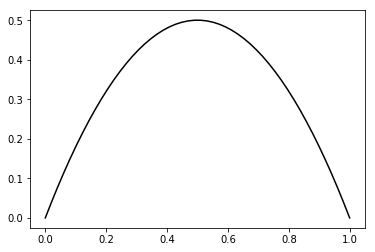

In [154]:
r = 2
x = np.linspace(0,1)
plt.plot(x,logistic(r,x),'k')
plt.show()

In [155]:
def bifurcation_diagram(x0, n_skip, n_iter, r_min=1, r_max=4, step=0.0001, double=True):
    R = []
    X = []
    
    r_range = np.linspace(r_min, r_max, int(1/step))
    
    for r in r_range:
        if double:
            x = x0
        else:
            x = np.float32(x0)
            r = np.float32(r)
        
        for i in range(n_iter + n_skip + 1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
                
            x = logistic(r, x)
    
    plt.plot(R, X, ls='', marker=',')
    plt.ylim(0, 1)
    plt.xlim(r_min, r_max)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()

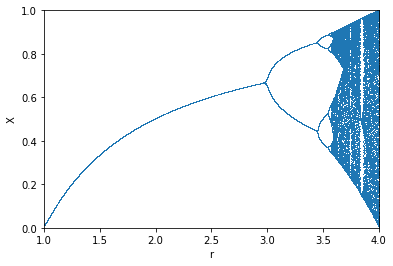

In [156]:
bifurcation_diagram(0.2, 100, 20)

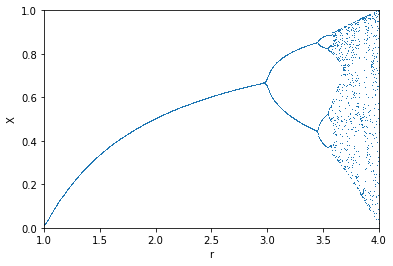

In [157]:
bifurcation_diagram(0.2, 100, 5,step=0.001)

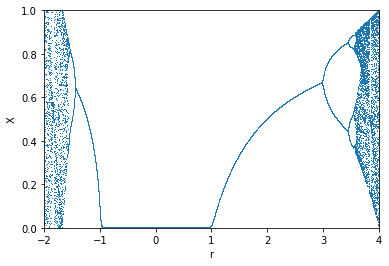

In [158]:
bifurcation_diagram(0.2, 100, 5,r_min=-2,step=0.0001)

#### b)
Dla tych samych wartości x0 oraz r (3.75 <= r <= 3.8) porównaj trajektorie obliczone
z użyciem pojedynczej i podwójnej precyzji. Wyjaśnij otrzymane wyniki.

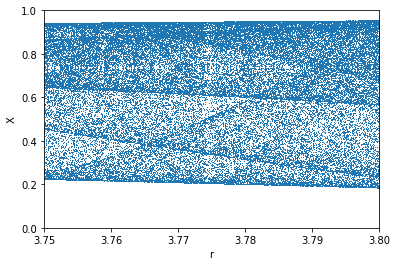

In [159]:
#double precision
bifurcation_diagram(0.25, 100, 5, r_min=3.75, r_max=3.8)

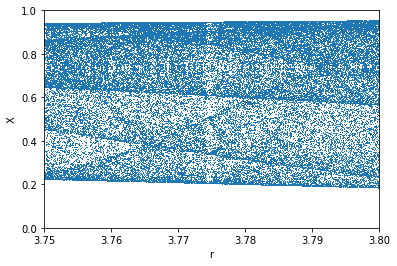

In [160]:
#single precision
bifurcation_diagram(0.25, 100, 5, r_min=3.75, r_max=3.8,double=False)

#### c)
Dla r = 4 i różnych wartości x0 wyznacz (pojedyncza precyzja) liczbę iteracji
potrzebnych do osiągnięcia zera. Przedstaw interpretację rezultatów

In [ ]:
r = np.float32(4)
x0 = np.float32(0.2)

i =0 
x = logistic(r,x0)
while x != np.float32(0):
    x = logistic(r,x)
    i += 1
    if i % 50000 == 0: print(x)
print(x)
print(i)